# Part I - Loan Data from Prosper Exploration


## Introduction

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate(or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("prosperLoanData.csv")

In [3]:
# Check te first five rows of dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# 16 columns were selected from the Dataset to aid easier exploration and visualization process
df1 = df.loc[:,["ListingKey", "ListingNumber", "Term", "LoanStatus", "BorrowerAPR", "BorrowerRate", "LenderYield",
                "ListingCategory (numeric)", "BorrowerState", "Occupation", "EmploymentStatus", "IsBorrowerHomeowner",
                "IncomeRange", "IncomeVerifiable", "StatedMonthlyIncome","Investors"]]

In [5]:
# Checking for the null values in the the new dataset
df1.isna().sum()

ListingKey                      0
ListingNumber                   0
Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
LenderYield                     0
ListingCategory (numeric)       0
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
IsBorrowerHomeowner             0
IncomeRange                     0
IncomeVerifiable                0
StatedMonthlyIncome             0
Investors                       0
dtype: int64

In [6]:
# Checking for the percentage of null values in columns
sum = df1.isna().sum()
sum/len(df1) * 100

ListingKey                   0.000000
ListingNumber                0.000000
Term                         0.000000
LoanStatus                   0.000000
BorrowerAPR                  0.021942
BorrowerRate                 0.000000
LenderYield                  0.000000
ListingCategory (numeric)    0.000000
BorrowerState                4.840394
Occupation                   3.149109
EmploymentStatus             1.979164
IsBorrowerHomeowner          0.000000
IncomeRange                  0.000000
IncomeVerifiable             0.000000
StatedMonthlyIncome          0.000000
Investors                    0.000000
dtype: float64

In [7]:
# This function checks the datatype of the each column and fill the null values with its mean/mode
def myfillna(series):
    """This function checks the datatype of the column and fill the null values with its mean for integer and float
    datatypes and mode for string datatypes"""
    if series.dtype is np.dtype(int):
        return series.fillna(series.mean())
    if series.dtype is np.dtype(float):
        return series.fillna(series.mean())
    if series.dtype is np.dtype("O"):
        return series.fillna(series.mode()[0])
    else:
        return series

In [8]:
# Applying the myfillna function to dataframe
df1 = df1.apply(lambda x: myfillna(x))

In [9]:
# Check for null values again
df1.isna().sum()

ListingKey                   0
ListingNumber                0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
IsBorrowerHomeowner          0
IncomeRange                  0
IncomeVerifiable             0
StatedMonthlyIncome          0
Investors                    0
dtype: int64

In [10]:
# Checking for the datatype of columns
df1.dtypes

ListingKey                    object
ListingNumber                  int64
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
IsBorrowerHomeowner             bool
IncomeRange                   object
IncomeVerifiable                bool
StatedMonthlyIncome          float64
Investors                      int64
dtype: object

In [11]:
# Checking basic statistics of dataset
df1.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),StatedMonthlyIncome,Investors
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,1.139370e+05,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,2.774209,5.608026e+03,80.475228
std,3.280762e+05,10.436212,0.080355,0.074818,0.074516,3.996797,7.478497e+03,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,0.000000,0.000000e+00,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,1.000000,3.200333e+03,2.000000
50%,6.005540e+05,36.000000,0.209790,0.184000,0.173000,1.000000,4.666667e+03,44.000000
75%,8.926340e+05,36.000000,0.283700,0.250000,0.240000,3.000000,6.825000e+03,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,20.000000,1.750003e+06,1189.000000


In [12]:
df1.head()

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,Investors
0,1021339766868145413AB3B,193129,36,Completed,0.16516,0.1580,0.1380,0,CO,Other,Self-employed,True,"$25,000-49,999",True,3083.333333,258
1,10273602499503308B223C1,1209647,36,Current,0.12016,0.0920,0.0820,2,CO,Professional,Employed,False,"$50,000-74,999",True,6125.000000,1
2,0EE9337825851032864889A,81716,36,Completed,0.28269,0.2750,0.2400,0,GA,Other,Not available,False,Not displayed,True,2083.333333,41
3,0EF5356002482715299901A,658116,36,Current,0.12528,0.0974,0.0874,16,GA,Skilled Labor,Employed,True,"$25,000-49,999",True,2875.000000,158
4,0F023589499656230C5E3E2,909464,36,Current,0.24614,0.2085,0.1985,2,MN,Executive,Employed,True,"$100,000+",True,9583.333333,20


In [13]:
#convert IncomeRange into ordered categorical types
income_range_dict = {"$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999",
                    "$100,000+", "Not employed", "Not displayed"}

# Return the ordered dict into income range column
income_range = pd.api.types.CategoricalDtype(ordered = True, categories = income_range_dict)

# Use pandas.astype() to convert the "IncomeRange" column from plain object to an ordered categorical type
df1["IncomeRange"] = df1["IncomeRange"].astype(income_range)

In [14]:
# The Listing Category (numeric) column contain numbers that are in categories
# The category of listing the borrower selected when postiing their listing. 
#I will map each number to its category

df1["ListingCategory (numeric)"] = df1["ListingCategory (numeric)"].map({0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement",
                                     3: "Business", 4: "Personal Loan", 5: "Student Use", 6: "Auto", 7: "Other",
                                     8: "Baby&Adoption", 9: "Boat", 10: "Cosmetic Procedure", 11: "Engagement Ring", 
                                    12: "Green Loans", 13: "Household Expenses", 14: "Large Purchases", 15: "Medical/Dental",
                                     16: "Motorcycle", 17: "RV", 18: "Taxes", 19: "Vacation", 20: "Wedding Loans"})

In [15]:
# Rename the "ListingCategory (numeric)" column to "ListingCategory"
df1.rename(columns={"ListingCategory (numeric)": "ListingCategory"}, inplace= True)

### What is the structure of your dataset?

The dataset consist of 113937 loan features with 81 columns. Most variables are numeric in nature, but some variables like 'LoanStatus', 'BorrowerState', 'Occupation', 'EmploymentStatus', and 'IncomeRange' are categorical variables. The income variable has ordered factor with the following levels:
`$0`, `$1-24,999`, `$25000-49,999` , `$50,000-74,999`, `$75,000-99,999`, `$100,000+`, `Not employed`, `Not displayed`.

For the purpose of this project 16 columns were selected for exploration
"ListingKey", "ListingNumber", "Term", "LoanStatus", "BorrowerAPR", "BorrowerRate", "LenderYield", "ListingCategory (numeric)", "BorrowerState", "Occupation", "EmploymentStatus", "IsBorrowerHomeowner", "IncomeRange", "IncomeVerifiable", "StatedMonthlyIncome","Investors"


### What is/are the main feature(s) of interest in your dataset?

There are sixteen features I have selected to help explore the dataset, I am most interested in determining which borrower are likely to complete or default on the loan


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The ListingCategory, EmploymentStatus, and EmploymentStatus are expected to have the strongest effects on Loan status. I also expect the Borrower's Annual Percentage(APR), The Borrower's interest rate and Lender yield on the loan to have an effect on the Loan status.

## Univariate Exploration 
In this section I took a deeper look at the main variable of interest LoanStatus and other variables that will help investigate the main variable of interest

### Question 
What is the distribution of the main variable of interest: Loan status

In [16]:

def countplot_1(column, ylabel):
    "function for countplot"
    order = ["Completed", "Current", "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)",
    "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Defaulted", "Chargedoff"]
    income_order = df1[column].value_counts().index
    base_color = sb.color_palette()[0]
    sb.countplot(data = df1, x = column, color = base_color, order = order)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 85)

### Visualization

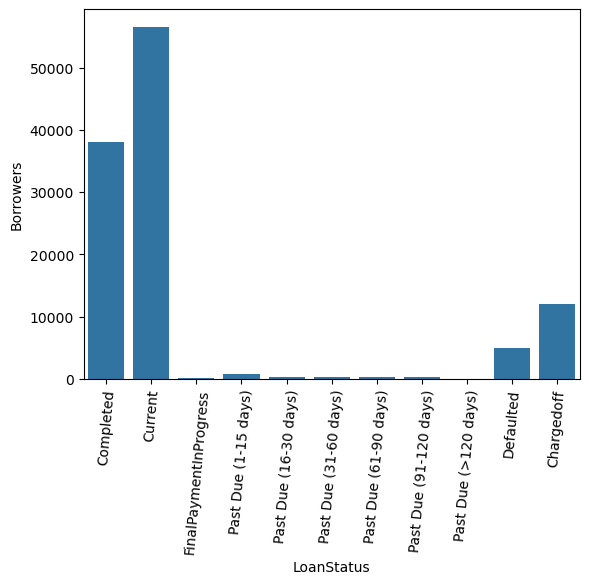

In [17]:
countplot_1("LoanStatus", "Borrowers")

### Observation
The visulization of the main variable in the dataset "Loan status" indicated that customers still servicing their loan have the
highest number followed by customers that have completed loan repayment, about 12,000 customers are being chargedoff while less than 10,000 customer
have defaulted in loan payment

### Question
What is the distribution of the borrowers annual percentage rate

In [18]:
def histplot(column, ylabel):
    log_binsize = 0.025
    bins = 10 ** np.arange(-2, np.log10(df1[column].max()) + log_binsize, log_binsize)
    plt.hist(data = df1, x = column, bins = bins)
    plt.ylabel(ylabel)
    plt.xlabel(column +"(%)");

### Visualization

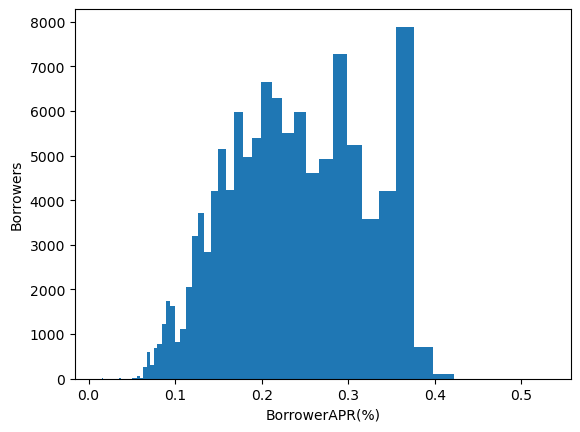

In [19]:
histplot("BorrowerAPR", "Borrowers")

### Observation 
Visualizing the borrower Annual percentage rate on a smaller bin size shows that there is a peak of annual percentage rate between 30 and 40 percentage, while
majority of the borrower's annual percentage rate falls within 20 to 25 percentage.  

### Question
What is the distribution of the borrowers interest rate

In [20]:

def histplot(column, ylabel):
    log_binsize = 0.025
    bins = 10 ** np.arange(-1, np.log10(df1[column].max()) + log_binsize, log_binsize)
    plt.hist(data = df1, x = column, bins = bins)
    plt.ylabel(ylabel)
    plt.xlabel(column +"(%)");

### Visualization

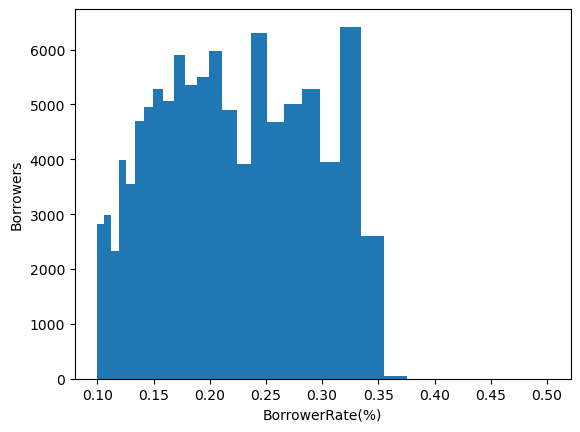

In [21]:
histplot("BorrowerRate", "Borrowers")

### Observation
The distribution has two major peaks making it a bimodal distribution, with the highest at 35%
and the second highest at 30% only a few borrower fall within these range, most borrowers fall below the peaks

### Question
What is the distribution of the lender yield on loan

In [22]:

def histplot(column, ylabel):
    log_binsize = 0.025
    bins = 10 ** np.arange(-2, np.log10(df1[column].max()) + log_binsize, log_binsize)
    plt.hist(data = df1, x = column, bins = bins)
    plt.ylabel(ylabel)
    plt.xlabel(column +"(%)");

### Visualization

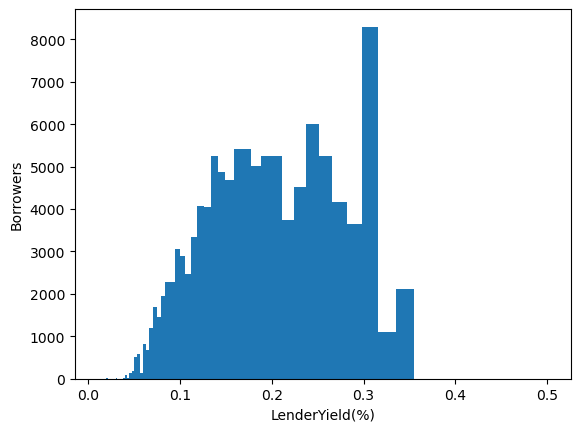

In [23]:

histplot("LenderYield", "Borrowers")

### Observation
The distrubution of lenderyield has a unimodal distribution with a peak at 30%, majority of the distribution falls 
within 10 to 25%, there was a decrease in distribution right after the peak.

### Question
What is the distribution of the Listing Category column on loan

### Visualization

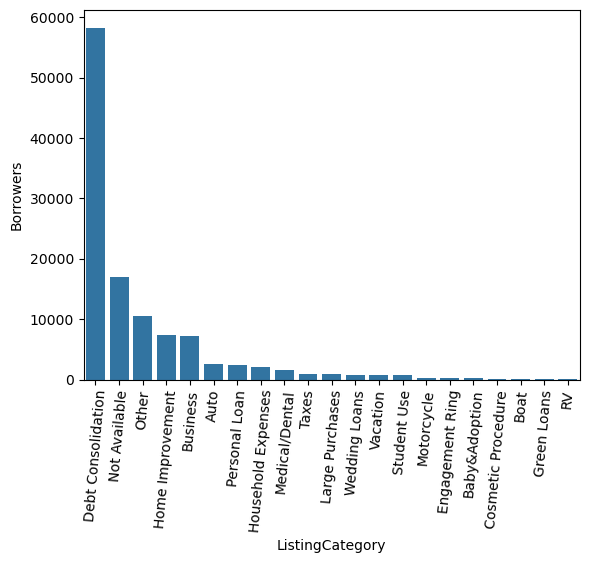

In [24]:
def countplot(column, ylabel):
    "function for countplot"
    income_order = df1[column].value_counts().index
    base_color = sb.color_palette()[0]
    sb.countplot(data = df1, x = column, color = base_color, order = income_order)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 85);
countplot("ListingCategory", "Borrowers")

### Observation
The borrower that took loan for debt consolidation seems to be the highest in the dataset with close to 60000 borrowers,
while borrowers that do not specify the purpose for which loan was might for followed with about 18000 borrowers,
borrowers that specify other purposes followed with 10000 borrowers in this category

### Question
What is the distribution of the Employmentstatus

### Visualization

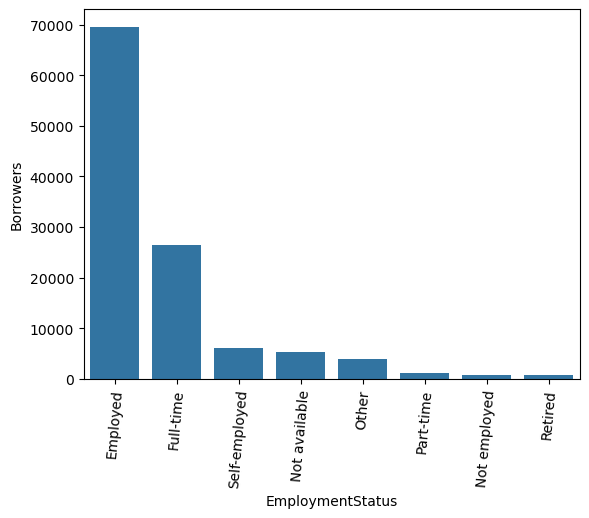

In [25]:

countplot("EmploymentStatus", "Borrowers")

### Observation
The borrowers in the employed category seems to be the most in the dataset, with close to 70000, followed by borrowers 
with full time job with about 27000 borrowers, while the retired category has the least borrower, this shows that the working 
class borrows more according to this dataset

### Question
What is the distribution of the lenght of loan expressed in month

### Visualization

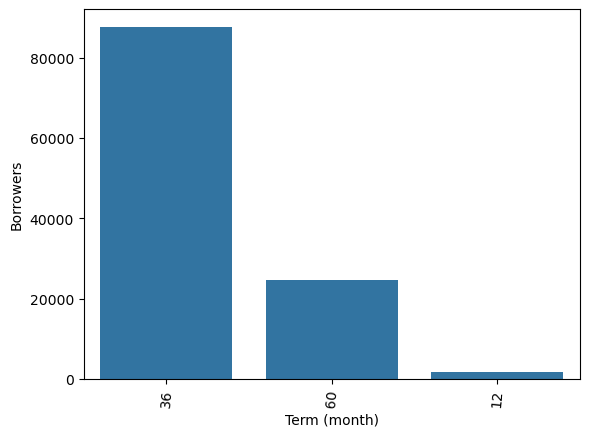

In [26]:
def month_countplot(column, ylabel):
    "function for countplot"
    income_order = df1[column].value_counts().index
    base_color = sb.color_palette()[0]
    sb.countplot(data = df1, x = column, color = base_color, order = income_order)
    plt.xlabel("Term (month)")
    plt.ylabel(ylabel)
    plt.xticks(rotation = 85)
month_countplot("Term", "Borrowers")

### Observation
Loan that has 36 month duration were the most in the dataset, borrowers seems to prefer that duration to others in the 
dataset about 80000 borrowers, 60 month loan duration has about 20000 borrowers while 12 month duration has about 2000
borrowers

### Question
What is the distribution of borrowers that have verifiable documents to support their income

### Visualization

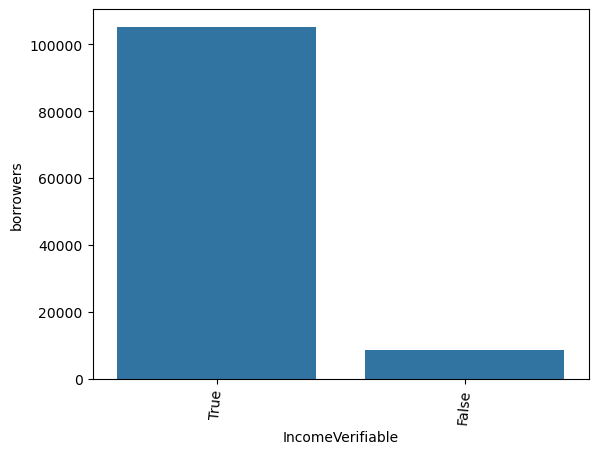

In [27]:

countplot("IncomeVerifiable", "borrowers")

### Observation
Most of the borrowers were able to provide documents that will support their income, with the plot above showing over 100000
borrowers, while only few were not able to provide verifiable documents for their income.

### Question
What is the distribution of the income range of borrowers

### Visualization

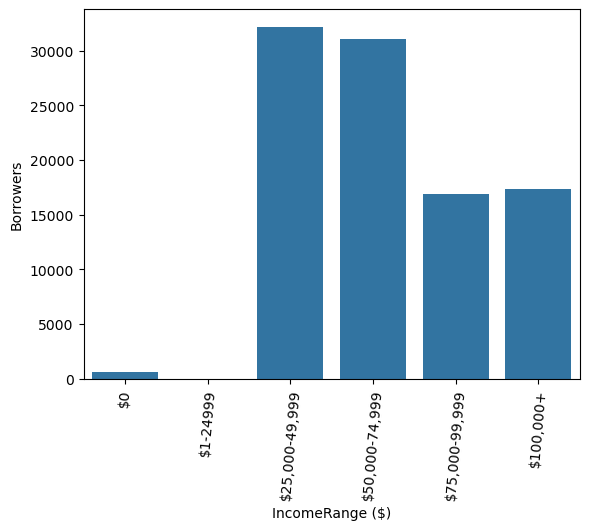

In [28]:
def countplot_2(column, ylabel):
    "function for countplot"
    order = ["$0", "$1-24999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]
    income_order = df1[column].value_counts().index
    base_color = sb.color_palette()[0]
    sb.countplot(data = df1, x = column, color = base_color, order = order)
    plt.xlabel("IncomeRange ($)")
    plt.ylabel(ylabel)
    plt.xticks(rotation = 85)



countplot_2("IncomeRange", "Borrowers")

### Observation
Borrowers within 25000 - 49,999 income range have the highest borrowers, followed closely by the borrowers in the
50000 - 74,999, followed by borrowers in the 100,000+ , and 75000 -99,999 respectively.

### Question
What is the distribution of home owners across the datsset

### Visualization

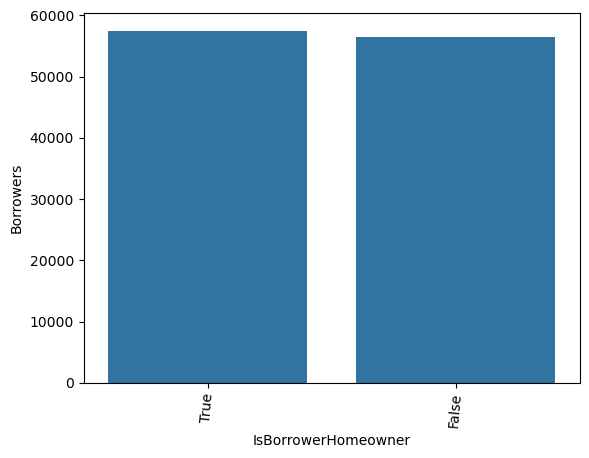

In [29]:

countplot("IsBorrowerHomeowner", "Borrowers")

### Observation
The borrowers that do not have a home are almost has those that have homes, this is an interesting insight from the dataset

## Bivariate Exploration
In this section I will be exploring relationships between the variables I have explored above in particular how these varible affect the main variable of interst(loan status) and relationships within themselves.

### Question 
What is the lenght of the loan as expressed in month with the loan status

### Visualization

In [30]:
def bi_countplot(column, hue):
    order = ["Completed", "Current","FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)",
            "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Defaulted", "Chargedoff"]
    sb.countplot(data = df1, x = column, hue = hue, hue_order= order)
    plt.xlabel("Term (month)")
    plt.ylabel("Borrowers")
    plt.title("LoanStatus per Term")
    plt.legend(loc = "best", bbox_to_anchor = (1, 1))

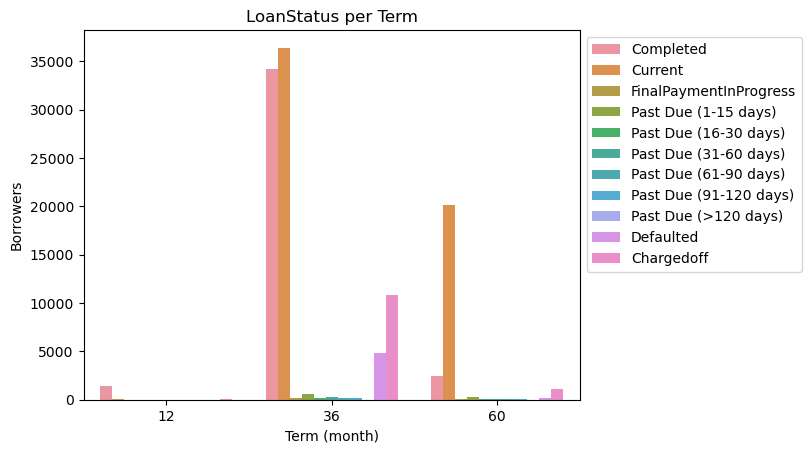

In [31]:
bi_countplot("Term", "LoanStatus")

### Observation
The loans the have 12 month term has little activities we can see a little above 1000 for completed loans in this category,
but the situation was different with loan with 36 month term current and completed loans are the higshest in this class, 
loan that were charged off and defaulted loan also hhave 10000 and 5000 borrower respectively. Loans with 36 month term do
 not have too many activities but current loans has the highest borrowers in this category.

### Question
Examine the relationship between Borrower's Rate and Borrower's Annual percentage Rate(APR)

### Visualization

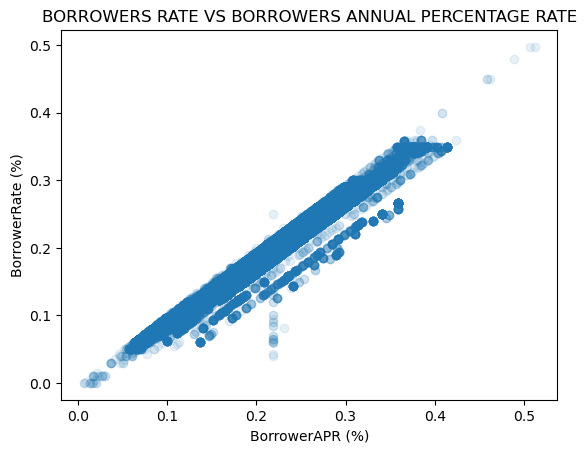

In [32]:

plt.scatter(data = df1, x = "BorrowerAPR", y = "BorrowerRate", alpha = 1/10)
plt.title("Borrowers Rate Vs Borrowers Annual Percentage Rate".upper())
plt.xlabel("BorrowerAPR (%)")
plt.ylabel("BorrowerRate (%)");


### Observation
Most of the borrowers fall between 6 to 40 percent BorrowerAPR and 5 to 35 BorrowersRate, some transperency was added 
using the "alpha" parameter to show the concentration of data points, there are some borrowers that have BorrowerRate and BorrowerAPR
below 10 percent, these boorrowers are more than borrowers that have BorrowerRate and BorrowerAPR above 40 percentage as indicated by 
the transparency

### Question
Examine the relationship between BorrowerAPR and LenderYield percentage Rate(APR)

### Visualization

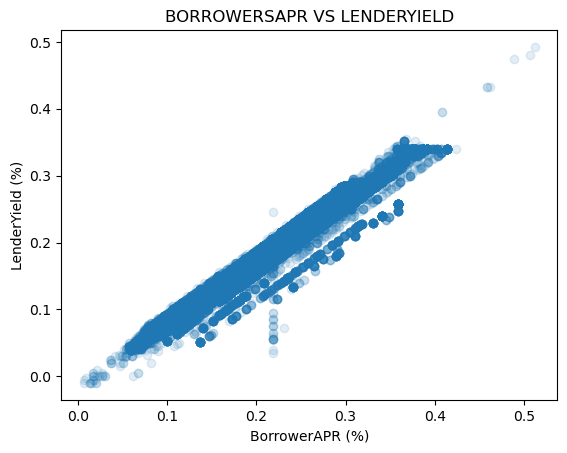

In [33]:

plt.scatter(data = df1, x = "BorrowerAPR", y = "LenderYield", alpha= 1/8)
plt.title("BorrowersAPR Vs LenderYield".upper())
plt.xlabel("BorrowerAPR (%)")
plt.ylabel("LenderYield (%)");

### Observation
Most of the borrowers fall between 6 to 43 percent BorrowerAPR and 5 to 35 LenderYield on the loan, some taransperency was added 
using the "alpha" to show the concentration of data points, there are some borrowers that has BorrowerAPR and LenderYield
less 10 percent these boorrowers are more than borrowers that have BorrowerAPR and LenderYield above 40 percent as indicated by 
the transparency

### Question
Examine the relationship between BorrowerRate and LenderYield

### Visualization

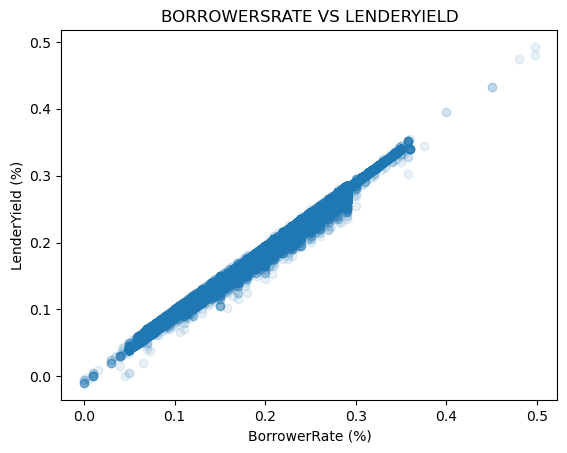

In [34]:

plt.scatter(data = df1, x = "BorrowerRate", y = "LenderYield", alpha= 1/10)
plt.title("BorrowersRate Vs LenderYield".upper())
plt.xlabel("BorrowerRate (%)")
plt.ylabel("LenderYield (%)");

### Observation
Most of the borrowers fall between 6 to 38 percent BorrowerRate and 5 to 35 LenderYield on the loan, some taransperency was added 
using the "alpha" to show the concentration of data points, there are is a sharp decrease in the concentration of point 
at 30 percent borrowerRate when the lenderYield was 25 pecent. Also observe that the LenderYield increases with 
Borrowerate to about 30 percent before a sharp reduction in the data points

In [35]:
df1.head(1)

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,Investors
0,1021339766868145413AB3B,193129,36,Completed,0.16516,0.158,0.138,Not Available,CO,Other,Self-employed,True,"$25,000-49,999",True,3083.333333,258


### Question
Examine the relationship between Listing Category and IncomeVeriable

### Visualization

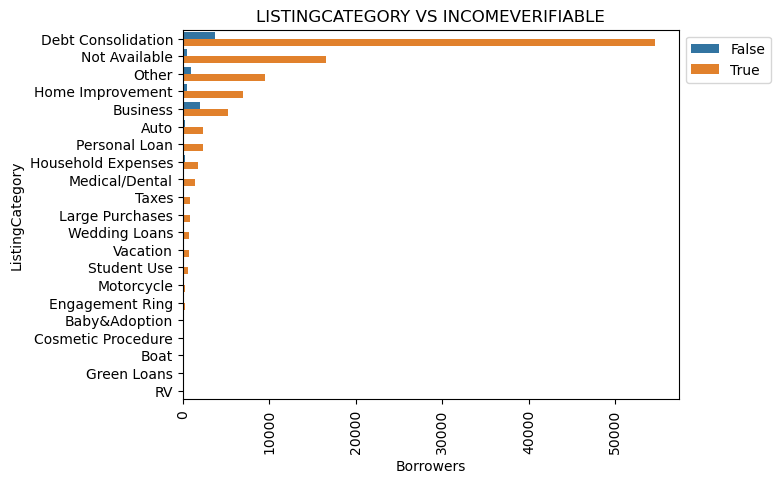

In [36]:

Category_order = df1["ListingCategory"].value_counts().index
sb.countplot(data = df1, y = "ListingCategory", hue = "IncomeVerifiable", order= Category_order)
plt.title("ListingCategory Vs IncomeVerifiable".upper())
plt.xlabel("Borrowers")
plt.legend(loc = "best", bbox_to_anchor = (1,1))
plt.xticks(rotation = 90);

### Observation
Borrowers that got loans for debt consolidation has the highest income verfiable documents(i.e they were able to support 
their income with required documnets), but then again this category has the highest borrowers who does not have the
required document. Borrowers who got loans for home improvement and businesses also have highest number in positive category

### Question
Examine the relationship between IncomeRange and EmploymentStatus

### Visualization

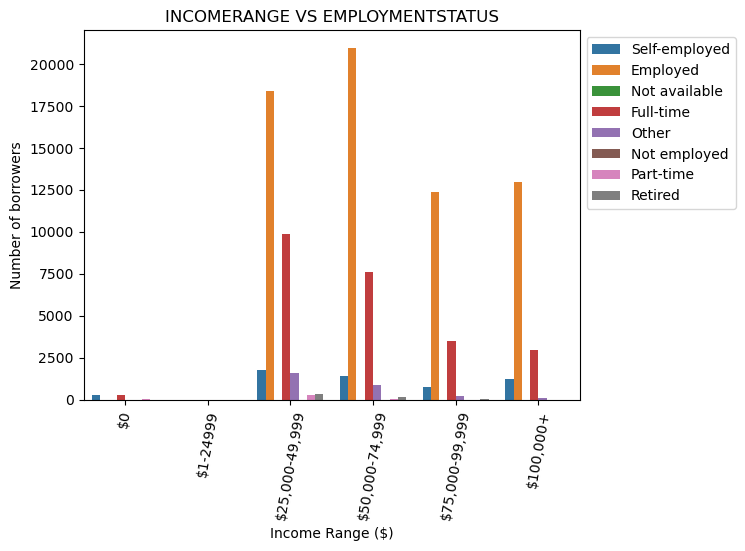

In [37]:

order = ["$0", "$1-24999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]
sb.countplot(data = df1, x = "IncomeRange", hue = "EmploymentStatus", order= order)
plt.title("IncomeRange Vs EmploymentStatus".upper())
plt.legend(loc = "best", bbox_to_anchor = (1, 1))
plt.xlabel("Income Range ($)")
plt.ylabel("Number of borrowers")
plt.xticks(rotation = 80);

### Observation
The plot above shows that Employed borrowers that earns between $50,000 - 75,000 has the highest figure in the dataset.
One intersting insight is that there are more borrowers who worked full time and more make less money, than borrowers 
who worked full time and make more money. The plot show that the more money borrowers make the lesser they are getting 
a loan.  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The loan status when compared with month term(duration of loan) shows that loans borrowed on the 36 month terms has the most completed loan status, these was easy because the 36 month term loan was actually the most gotten loan in dataset, for borrowers in the 60 month term duration the number of compeleted loans were low compare to the current loans


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a general linear trend in the relationship between the quantative fields in the dataset. while I added transparency to show the concentration of data points, some other interesting insights were revealed:
The most borrowers fall within the range 6 to 40 percentage of the columns(BorrowerRate, BorrowerAPR, lendeYield) 

## Multivariate Exploration

This section focuses on the the relationship between the main variable of study(loan status) and other variables, more insights were also derived by combining the numerical variables(BorrowerRate, BorrowerAPR, LenderYield) with more categorical variable.

### Question
Examine the relationship between BorrowRate BorrowerAPR and borrowers that have their income verified

### Visualization

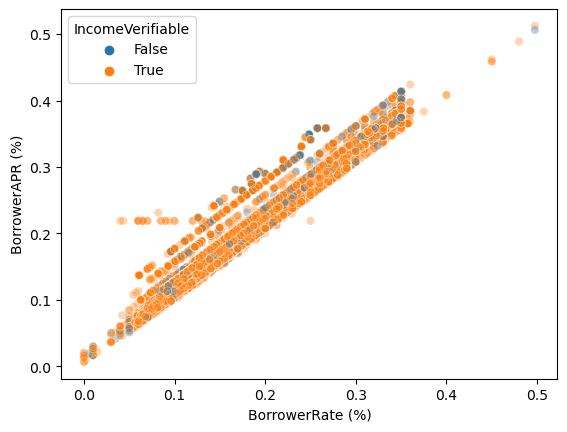

In [38]:

sb.scatterplot(data = df1, x = "BorrowerRate", y = "BorrowerAPR", hue = "IncomeVerifiable", alpha= 1/3)
plt.ylabel("BorrowerAPR (%)")
plt.xlabel("BorrowerRate (%)");

### Observation
While majority of the borrowers have their income verified, there was some interesting trends to be observed from the plot, 
I have added the `alpha` parameter see through some of the overlap, there is a concentration of borrowers that does not
have their income verified between 36% BorrowerAPR and 35% BorrowRate.

### Question
Examine the relationship between BorrowRate, LenderYield and borrowers that have their income verified

### Visualization

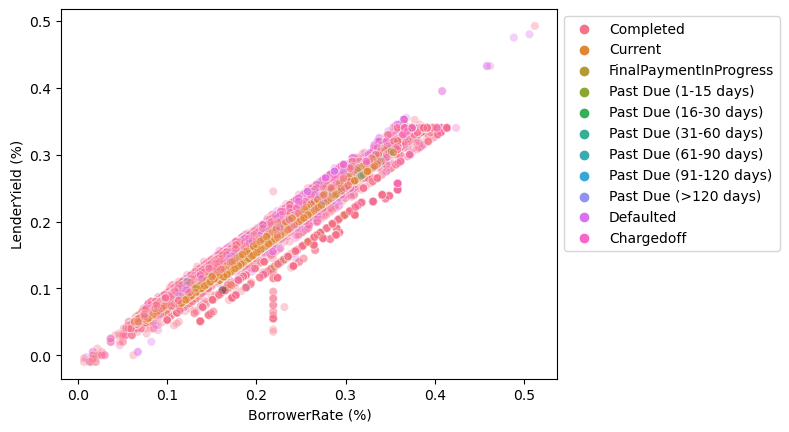

In [39]:
order = ["Completed", "Current", "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)",
            "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Defaulted", "Chargedoff"]
sb.scatterplot(data = df1, x = "BorrowerAPR", y = "LenderYield", hue = "LoanStatus", hue_order= order, alpha= 1/3)
plt.ylabel("LenderYield (%)")
plt.xlabel("BorrowerRate (%)");
plt.legend(loc = "best", bbox_to_anchor = (1,1));

### Observation
There is an interesting interesting insight derived from the plot above when Loan status is combined with lenders yeild and borrowers interest rate: 
1. We see that there are high number of borrowers that were charged off between 20 to 35% lenderyield and  25 to 39 % borrowers interest rate. This means that there is higher chances of a borrower been charged off when the interest rate is high.Observe that there are borrowers that have completed loan payment across the plot, one interesting trend is that current borrowers interest rate tend to start around 12% up 40%, there was no interest rate beyond this point.

### Question
Examine the relationship between LoanStatus, LenderYield and borrowers that are homeowers

### Visualization

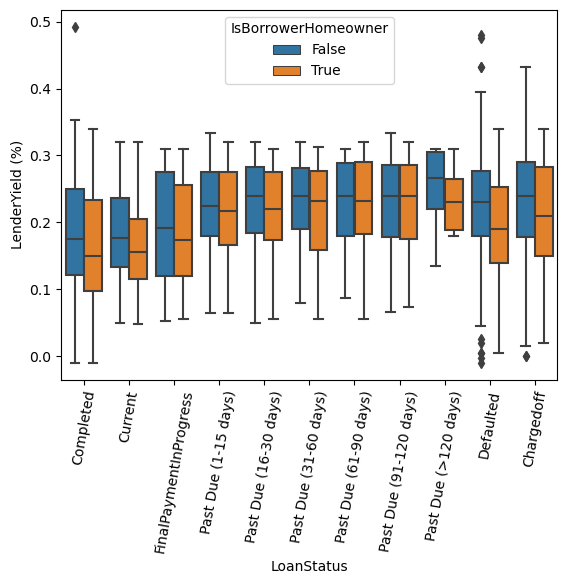

In [40]:
order = ["Completed", "Current", "FinalPaymentInProgress", "Past Due (1-15 days)", "Past Due (16-30 days)", "Past Due (31-60 days)", 
         "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Defaulted", "Chargedoff"]
sb.boxplot(data = df1, x ="LoanStatus", y = "LenderYield", hue= "IsBorrowerHomeowner", order= order)
plt.ylabel("LenderYield (%)")
plt.xticks(rotation = 80);

### Observation
The general trend in the plot shows that most borrowers are not homeowners. In each category the 
False class larger values than the True class, the only exception is the (FinalPaymentmentin 
progress) class which has as equal distribution between both True and False as regard homeowners

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

By added a third variable to the plots brings about more insights, the `alpha` parameter made clusters of transparent, I was able to deduced that there is a concentration of borrowers that does not have their income verified between 36% BorrowerAPR and 35% BorrowRate.


### Were there any interesting or surprising interactions between features?
1. We see that there are high number of borrowers that were charged off between 20 to 35% lenderyeild and  25 to 39 % borrowers interest rate. This means that there is higher chances of a borrower been charged off when the interest rate is high.
2. Observe that there are borrowers that have completed loan payment across the plot, one interesting trend is that current borrowers interst rate tend to start around 12% up 40%, there was no interest rate beyond this point.

## Conclusions

The data exploration started by loading in the dataset, only 186 columns of the dataset were used for the the exploration, appropiate data cleaning was done, transformation and data preprocessing were also carried out before exploration
 The exploration was divided into three parts:
 1. The Univariate exploration: Individual variables were thoroughly explored in this section, some of the insights derived was that there more borrowers currently servicing their loans than any other classes in the dataset.
 2. The number of borrowers that got loans for debt consolidation in the dataset was the highest.
 
 Bi-variate exploration involves combining two of those varibles to derive more insights: some off which include:
 1. Borrowers generally prefer loans with 36 month duration as this the highest number of borrowers in the dataset
 2. The higher the borrowers earn the lesser it is for them to apply for loans.
 
 Multi_variate exploration involves combining three or more variables to derive more insights:
 1. We see that there are high number of borrowers that were charged off between 20 to 35% lenderyield and  25 to 39 % borrowers interest rate. This means that there is higher chances of a borrower been charged off when the interest rate is high
